In [20]:
import numpy as np
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from readPatchOutput import *


repeat = 1
n_pic = 2160
nV1 = 1024
nblock = 5
nE = 768
pixel = '16'
Epick = []
Ipick = []
for i in range(nblock):
    for j in range(nV1):
        if j <nE:
            Epick.append(i*nV1+j)
        else:
            Ipick.append(i*nV1+j)

In [21]:
output_suffix0 = 'merge_test_1'
res_suffix = 'minimal-patch'
conLGN_suffix = 'test_lgn' 
conV1_suffix = 'test_v1'
res_suffix = "_" + res_suffix
conLGN_suffix = "_" + conLGN_suffix
conV1_suffix = "_" + conV1_suffix
output_suffix = output_suffix0
_output_suffix = "_" + output_suffix
res_fdr = '/root/autodl-tmp/ljy/resource_merge_test/'
setup_fdr = '/root/autodl-tmp/ljy/resource_merge_test/'
data_fdr = '/root/autodl-tmp/ljy/datamerge_test/'

LGN_V1_sFn = setup_fdr + "LGN_V1_sList" + conLGN_suffix + ".bin"
LGN_V1_idFn = setup_fdr + "LGN_V1_idList" + conLGN_suffix + ".bin"
LGN_spFn = data_fdr + "LGN_sp" + _output_suffix
parameterFn = data_fdr + "patchV1_cfg" +_output_suffix + ".bin"

# prec, sizeofPrec, vL, vE, vI, vR, vThres, gL, vT, typeAcc, nE, nI, sRatioLGN, sRatioV1, frRatioLGN, convolRatio, nType, nTypeE, nTypeI, frameRate, inputFn, _virtual_LGN, tonicDep, noisyDep = read_cfg(parameterFn)
LGN_V1_s = readLGN_V1_s0(LGN_V1_sFn)
LGN_V1_ID, nLGN_V1 = readLGN_V1_ID(LGN_V1_idFn)
# LGN_spScatter = readLGN_sp(LGN_spFn + ".bin", prec = prec)
LGN_V1_idFn = setup_fdr + "LGN_V1_idList" + conLGN_suffix + ".bin"
LGN_V1_ID, nLGN_V1 = readLGN_V1_ID(LGN_V1_idFn)
nLGN_V1_E = nLGN_V1[Epick]

FileNotFoundError: [Errno 2] No such file or directory: '/root/autodl-tmp/ljy/resource_merge_test/LGN_V1_sList_test_lgn.bin'

In [22]:
plt.hist(nLGN_V1,bins=np.arange(0,35,1),rwidth = 0.8)
plt.show()
plt.close()

NameError: name 'nLGN_V1' is not defined

In [23]:
res_fdr = '/root/autodl-tmp/ljy/resource_static_32pixel/'
setup_fdr = '/root/autodl-tmp/ljy/resource_static_32pixel/'
data_fdr = '/root/autodl-tmp/ljy/data_static_32pixel/'
output_suffix0 = 'static_32pixel'

cfg = []
fr = []
LGN_spike = []
for k in range(1,n_pic+1):
    #读取参数文件
    with open(res_fdr+f'static_color-grid_{k}_cfg.bin') as f:
        sf = np.fromfile(f,'f4',1)[0]
        ori = np.fromfile(f,'f4',1)[0]
        phase = np.fromfile(f,'f4',1)[0]
        c = np.fromfile(f,'f4',1)[0]
    cfg.append([sf,ori,phase,c])

    #读取文件
    with open(data_fdr + 'sample_spikeCount_' +  output_suffix0+'_' +str(k)+ '.bin') as f:
        sampleSize = np.fromfile(f, 'u4', 1)[0] #一共3840
        sample_t0, sample_t1 = np.fromfile(f, 'f4', 2)#0,5000
        nt = np.fromfile(f, 'u4', 1)[0]#40000
        nLGN = np.fromfile(f, 'u4', 1)[0]#512
        LGN_spike_time = np.fromfile(f, 'u4', nLGN*nt)
        sampleID = np.fromfile(f, 'u4', sampleSize)#id排序是顺序的
        sample_spikeCount = np.fromfile(f, 'u4', sampleSize)
        # print(k)
        if  sample_spikeCount.max() > 500:
            print(k,sample_spikeCount.max())
            # continue
    # LGN_spike_time = LGN_spike_time.reshape((nt,nLGN)).T #(512，16000)
    V1_output = sample_spikeCount.astype('f4')/(sample_t1-sample_t0)*1000
    fr.append(V1_output)
    # LGN_spike.append(LGN_spike_time)#(12,512,16000)
    # print(sample_spikeCount,nt,nLGN,LGN_spike_time,sampleID)
fr = np.array(fr)
cfg = np.array(cfg)
nOri = 12
# LGN_spike = np.array(LGN_spike)
# LGN_spike_count = LGN_spike.sum(axis=2)

In [24]:
print(fr.max())

78.4


In [38]:
max_idx = np.argmax(fr[500:1500],axis=0)+500
LGN_idx = np.argmax(LGN_spike_count,axis=0)
max_fr = np.max(fr[500:1500],axis=0)


In [39]:
max_sf = cfg[:,0][max_idx]
max_ori = cfg[:,1][max_idx]
pref_sf = max_sf
pref_ori = max_ori
LGN_ori = cfg[:,1][LGN_idx]
LGN_sf = cfg[:,0][LGN_idx]

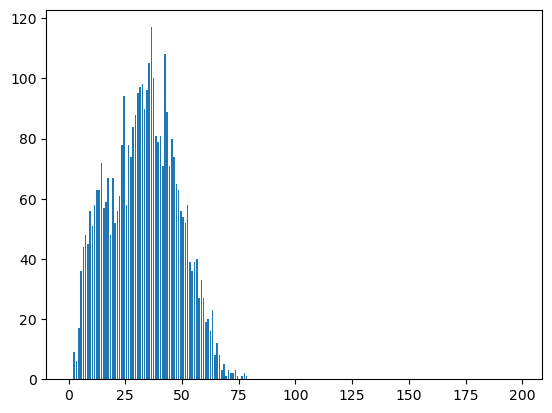

In [40]:
plt.hist(max_fr,bins=np.arange(200),rwidth=0.7)
plt.show()
plt.close()

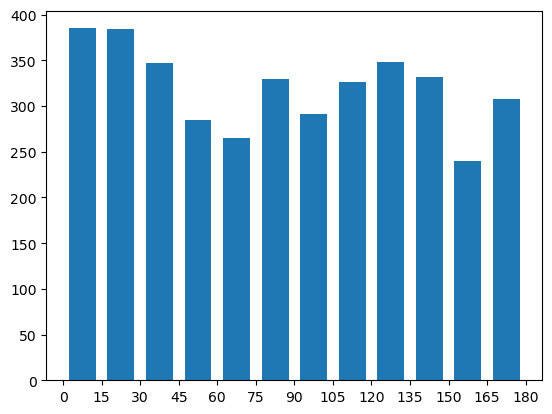

In [41]:
ori_range = np.arange(0,195,15)
plt.hist(max_ori,bins=ori_range,rwidth=0.7)
plt.xticks(ori_range)
plt.show()
plt.close()

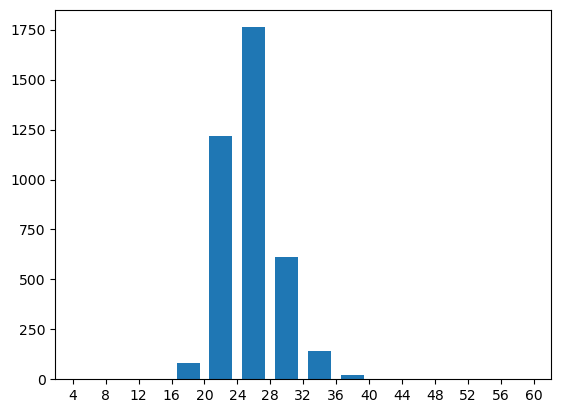

In [42]:
sf_range = np.arange(4,64,4)
plt.hist(max_sf,bins=sf_range,rwidth=0.7)
plt.xticks(sf_range)
plt.show()
plt.close()

ValueError: x and y must have same first dimension, but have shapes (12,) and (144,)

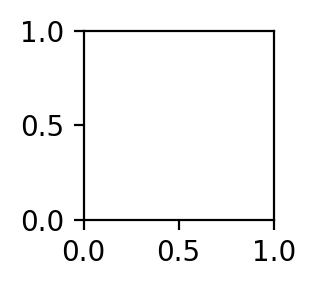

In [32]:
nori = 12
fig = plt.figure(figsize = (20,20),dpi = 200)
fig.subplots_adjust(hspace = 0.7,wspace = 0.7)
ori = [x*(180/nori) for x in range(nori)]
neu_ind = 5
for k in range(100):
    neu_ind += 5
    tmp_sf = pref_sf[neu_ind]
    tmp_fr = fr[:,neu_ind][cfg[:,0]==tmp_sf]

    
    ax = fig.add_subplot(10,10,k+1)
    ax.plot(ori,tmp_fr)
    # ax.set_title(f'pref_sf:{tmp_sf} \n nLGN:{nLGN_V1_E[neu_ind]}')
    ax.set_title(f'pref_sf:{tmp_sf}')

plt.show()
fig.savefig('./'+pixel+'_sample_ori_tc.png')        
plt.close()

    


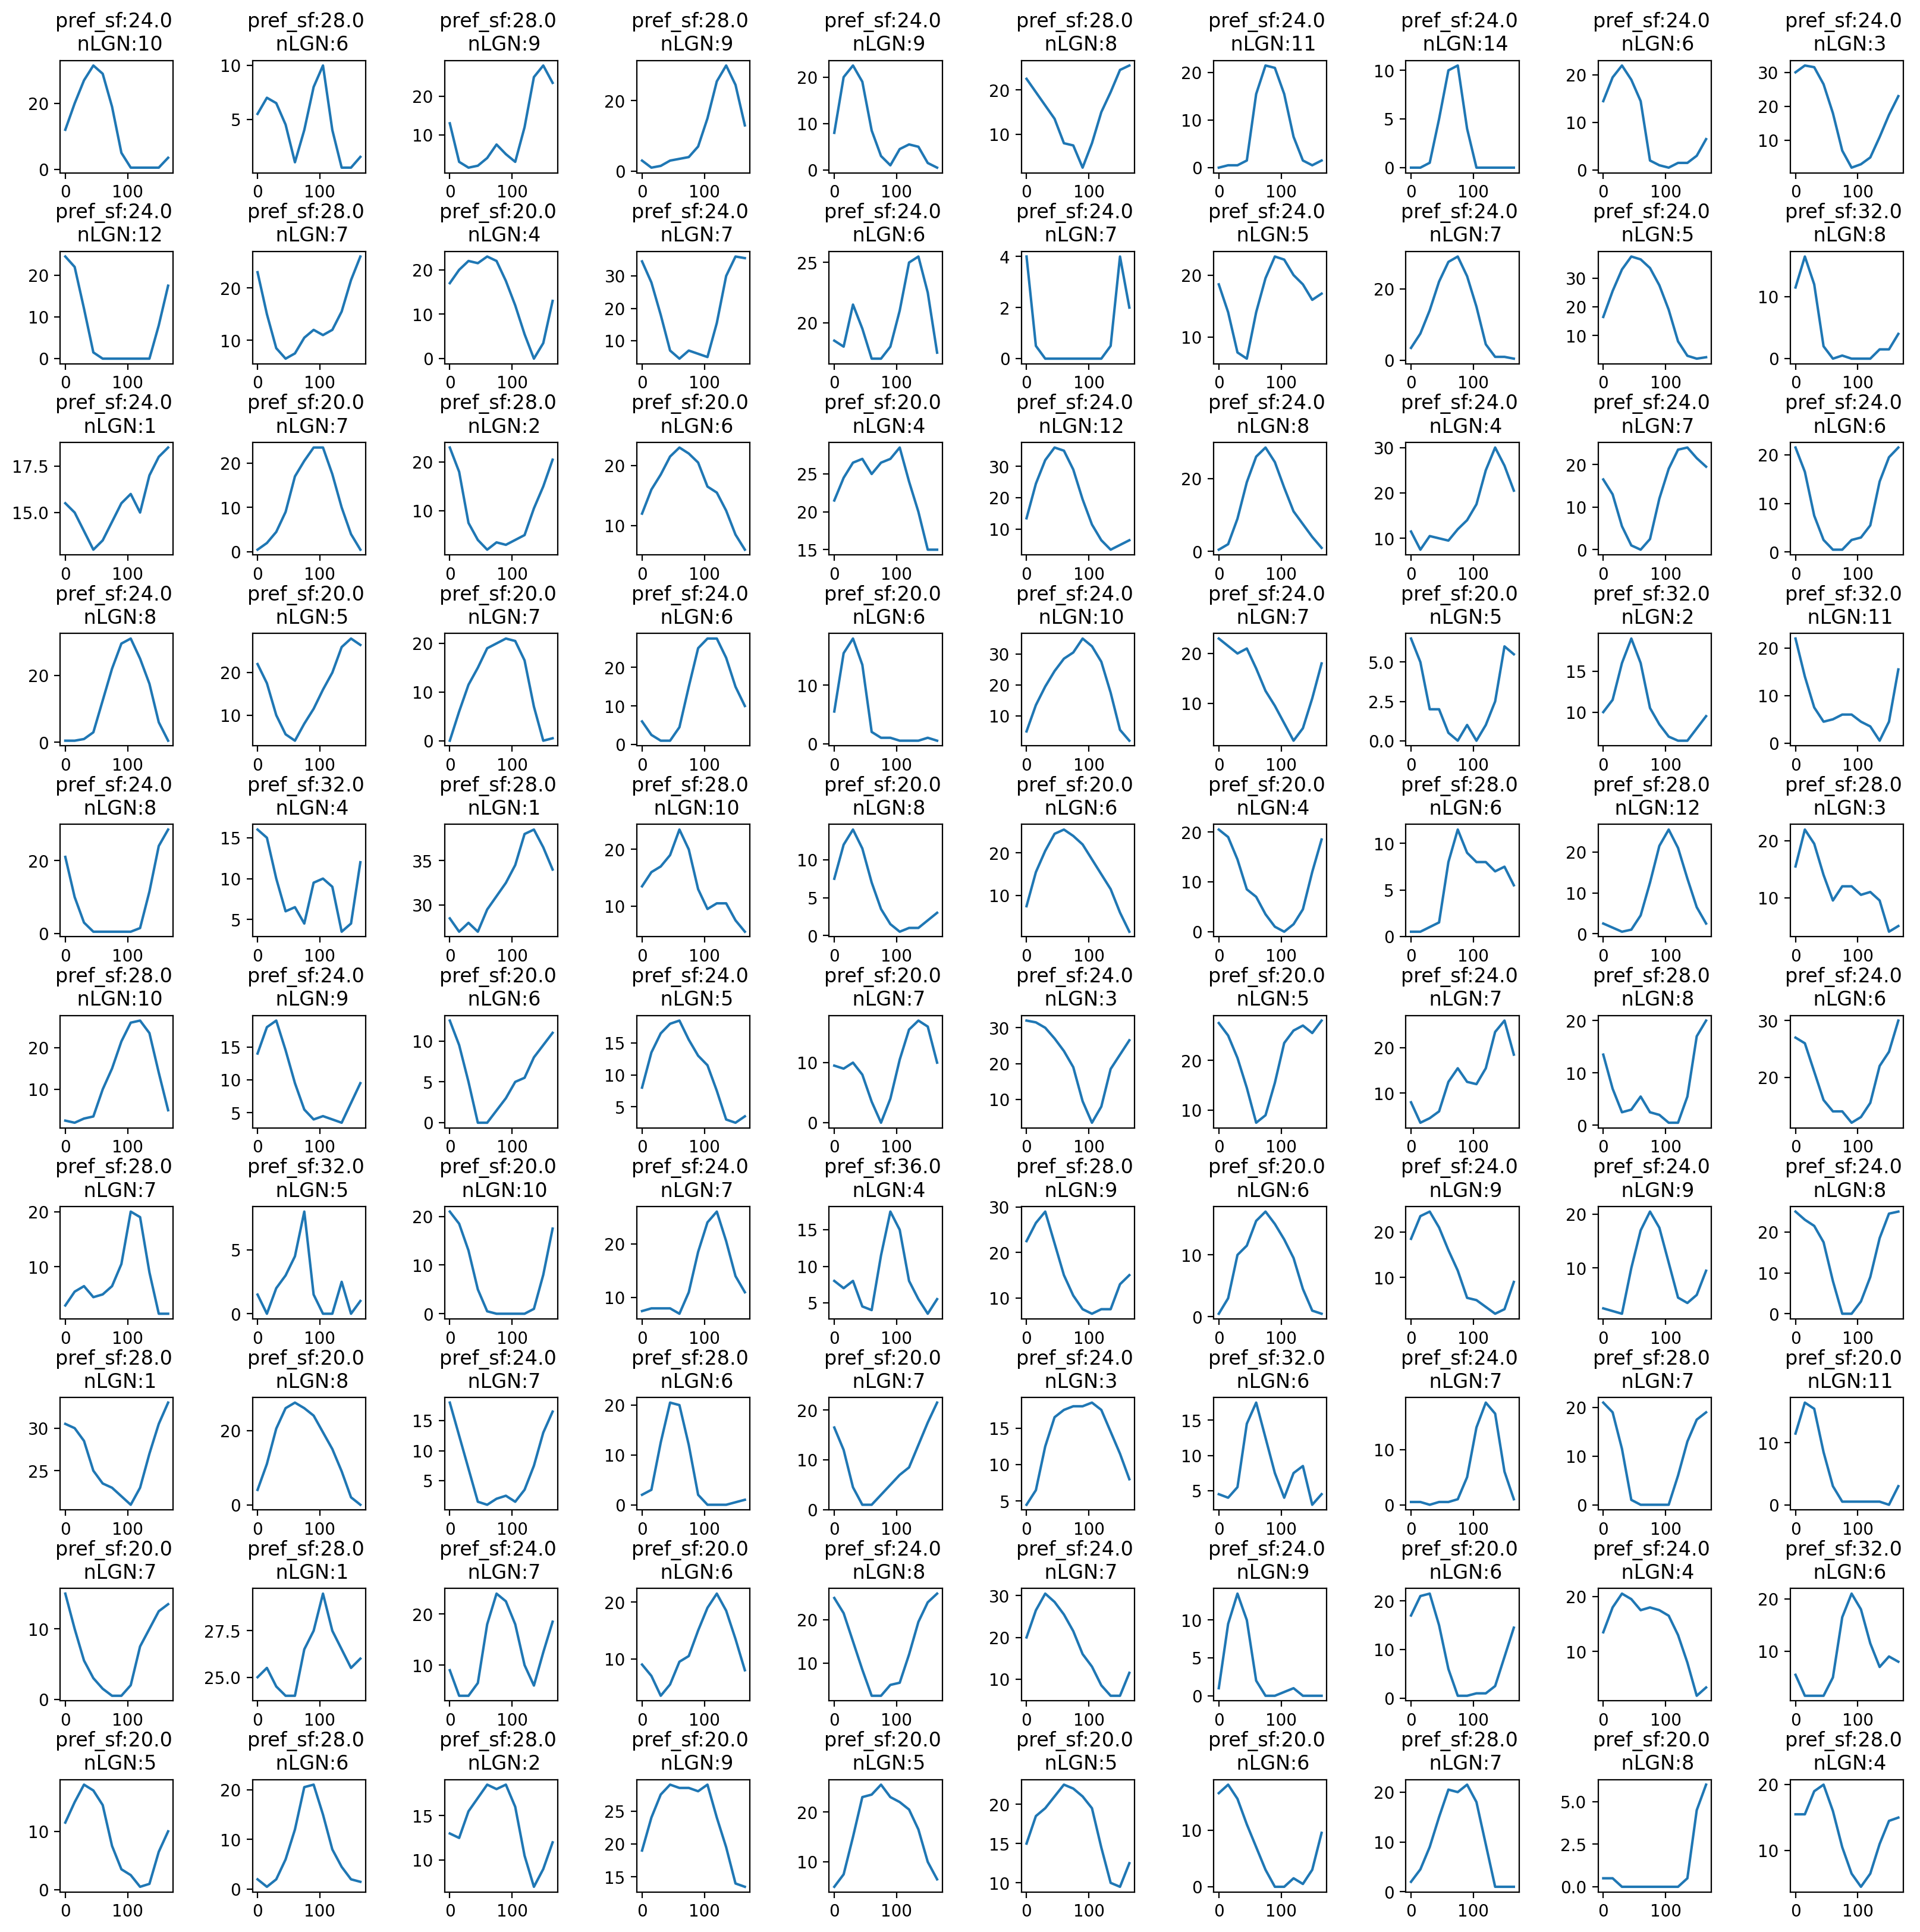

In [23]:
nori = 12
fig = plt.figure(figsize = (20,20),dpi = 200)
fig.subplots_adjust(hspace = 0.7,wspace = 0.7)
ori = [x*(180/nori) for x in range(nori)]
neu_ind = 5
for k in range(100):
    neu_ind += 5
    while nLGN_V1_E[neu_ind] == 0:
        neu_ind += 2
    tmp_sf = pref_sf[neu_ind]
    tmp_fr = fr[:,neu_ind][cfg[:,0]==tmp_sf]
    
    ax = fig.add_subplot(10,10,k+1)
    ax.plot(ori,tmp_fr)
    ax.set_title(f'pref_sf:{tmp_sf} \n nLGN:{nLGN_V1_E[neu_ind]}')

plt.show()
fig.savefig('./'+pixel+'_sample_ori_tc_LGNnot0.png')        
plt.close()

    


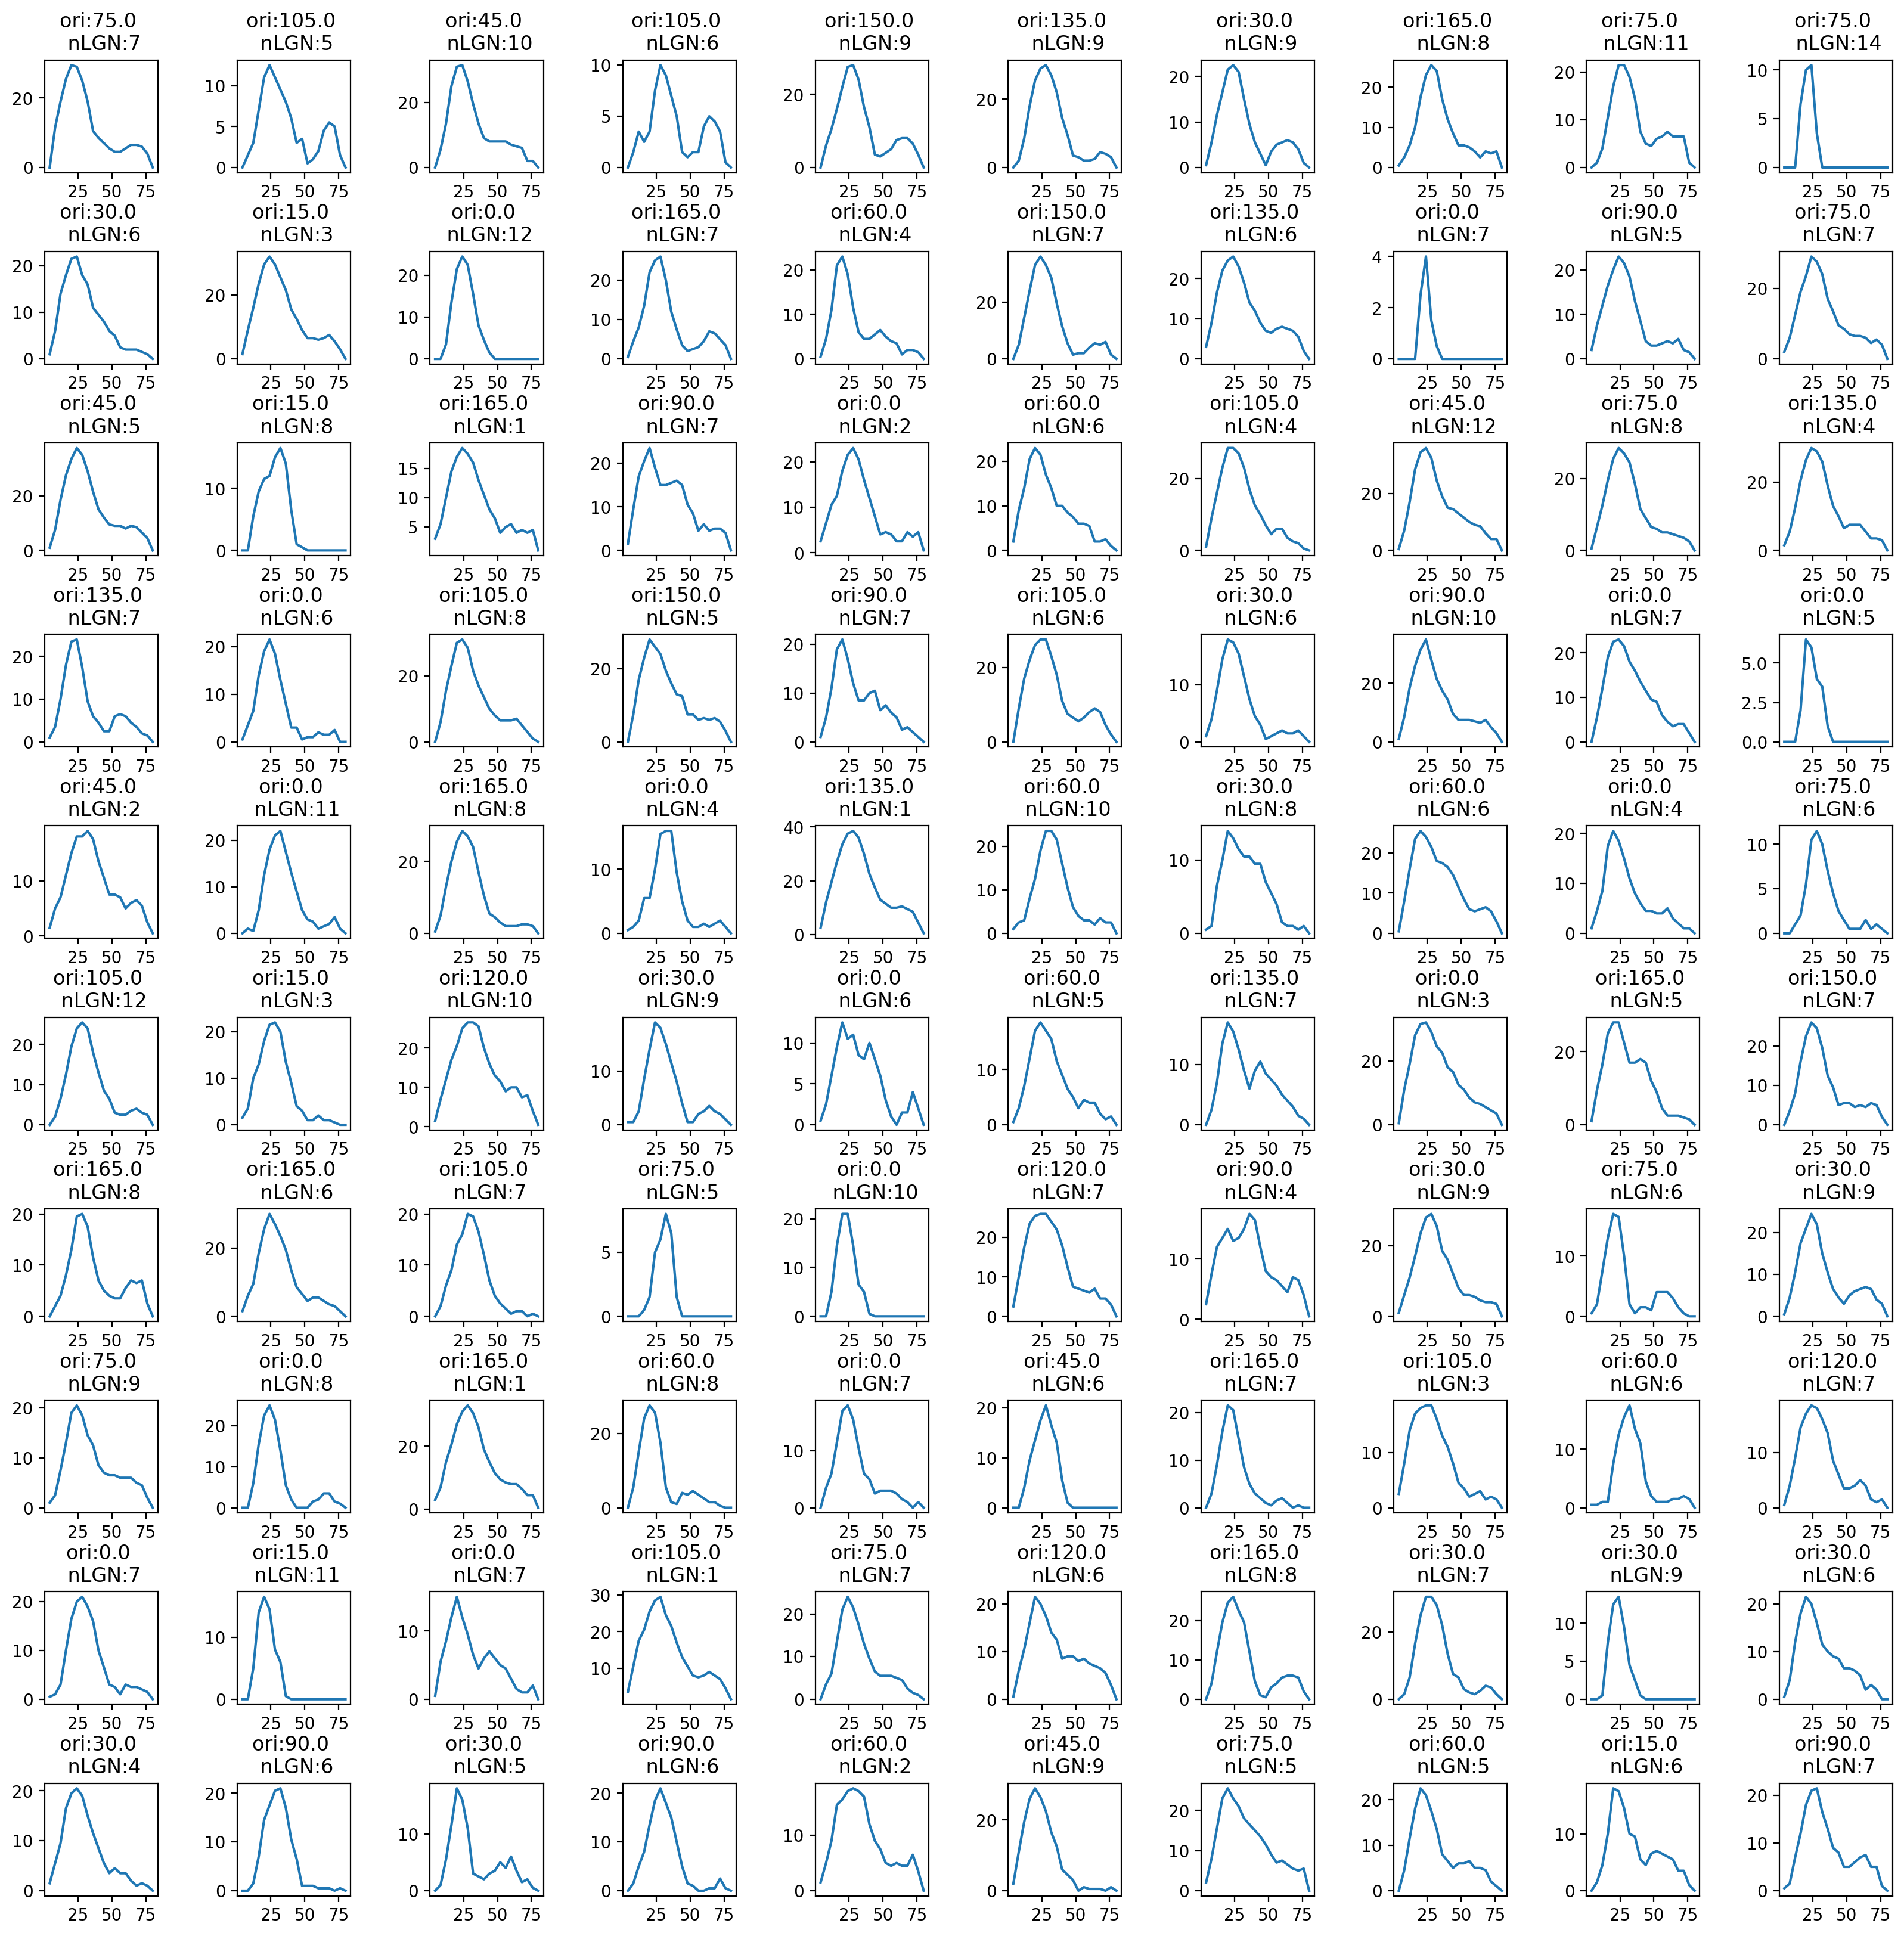

In [24]:
nsf = 20
fig = plt.figure(figsize = (20,20),dpi = 200)
fig.subplots_adjust(hspace = 0.7,wspace = 0.7)
sf = [4+x*4 for x in range(nsf)]
for k in range(100):
    neu_ind = k*5
    tmp_ori = pref_ori[neu_ind]
    # print(tmp_sf )
    tmp_fr = fr[:,neu_ind][cfg[:,1]==tmp_ori ]

    ax = fig.add_subplot(10,10,k+1)
    ax.plot(sf,tmp_fr)
    ax.set_title(f'ori:{tmp_ori} \n nLGN:{nLGN_V1_E[neu_ind]}')
    
plt.show()
fig.savefig('./'+pixel+'_sample_sf_tc.png')   
plt.close()

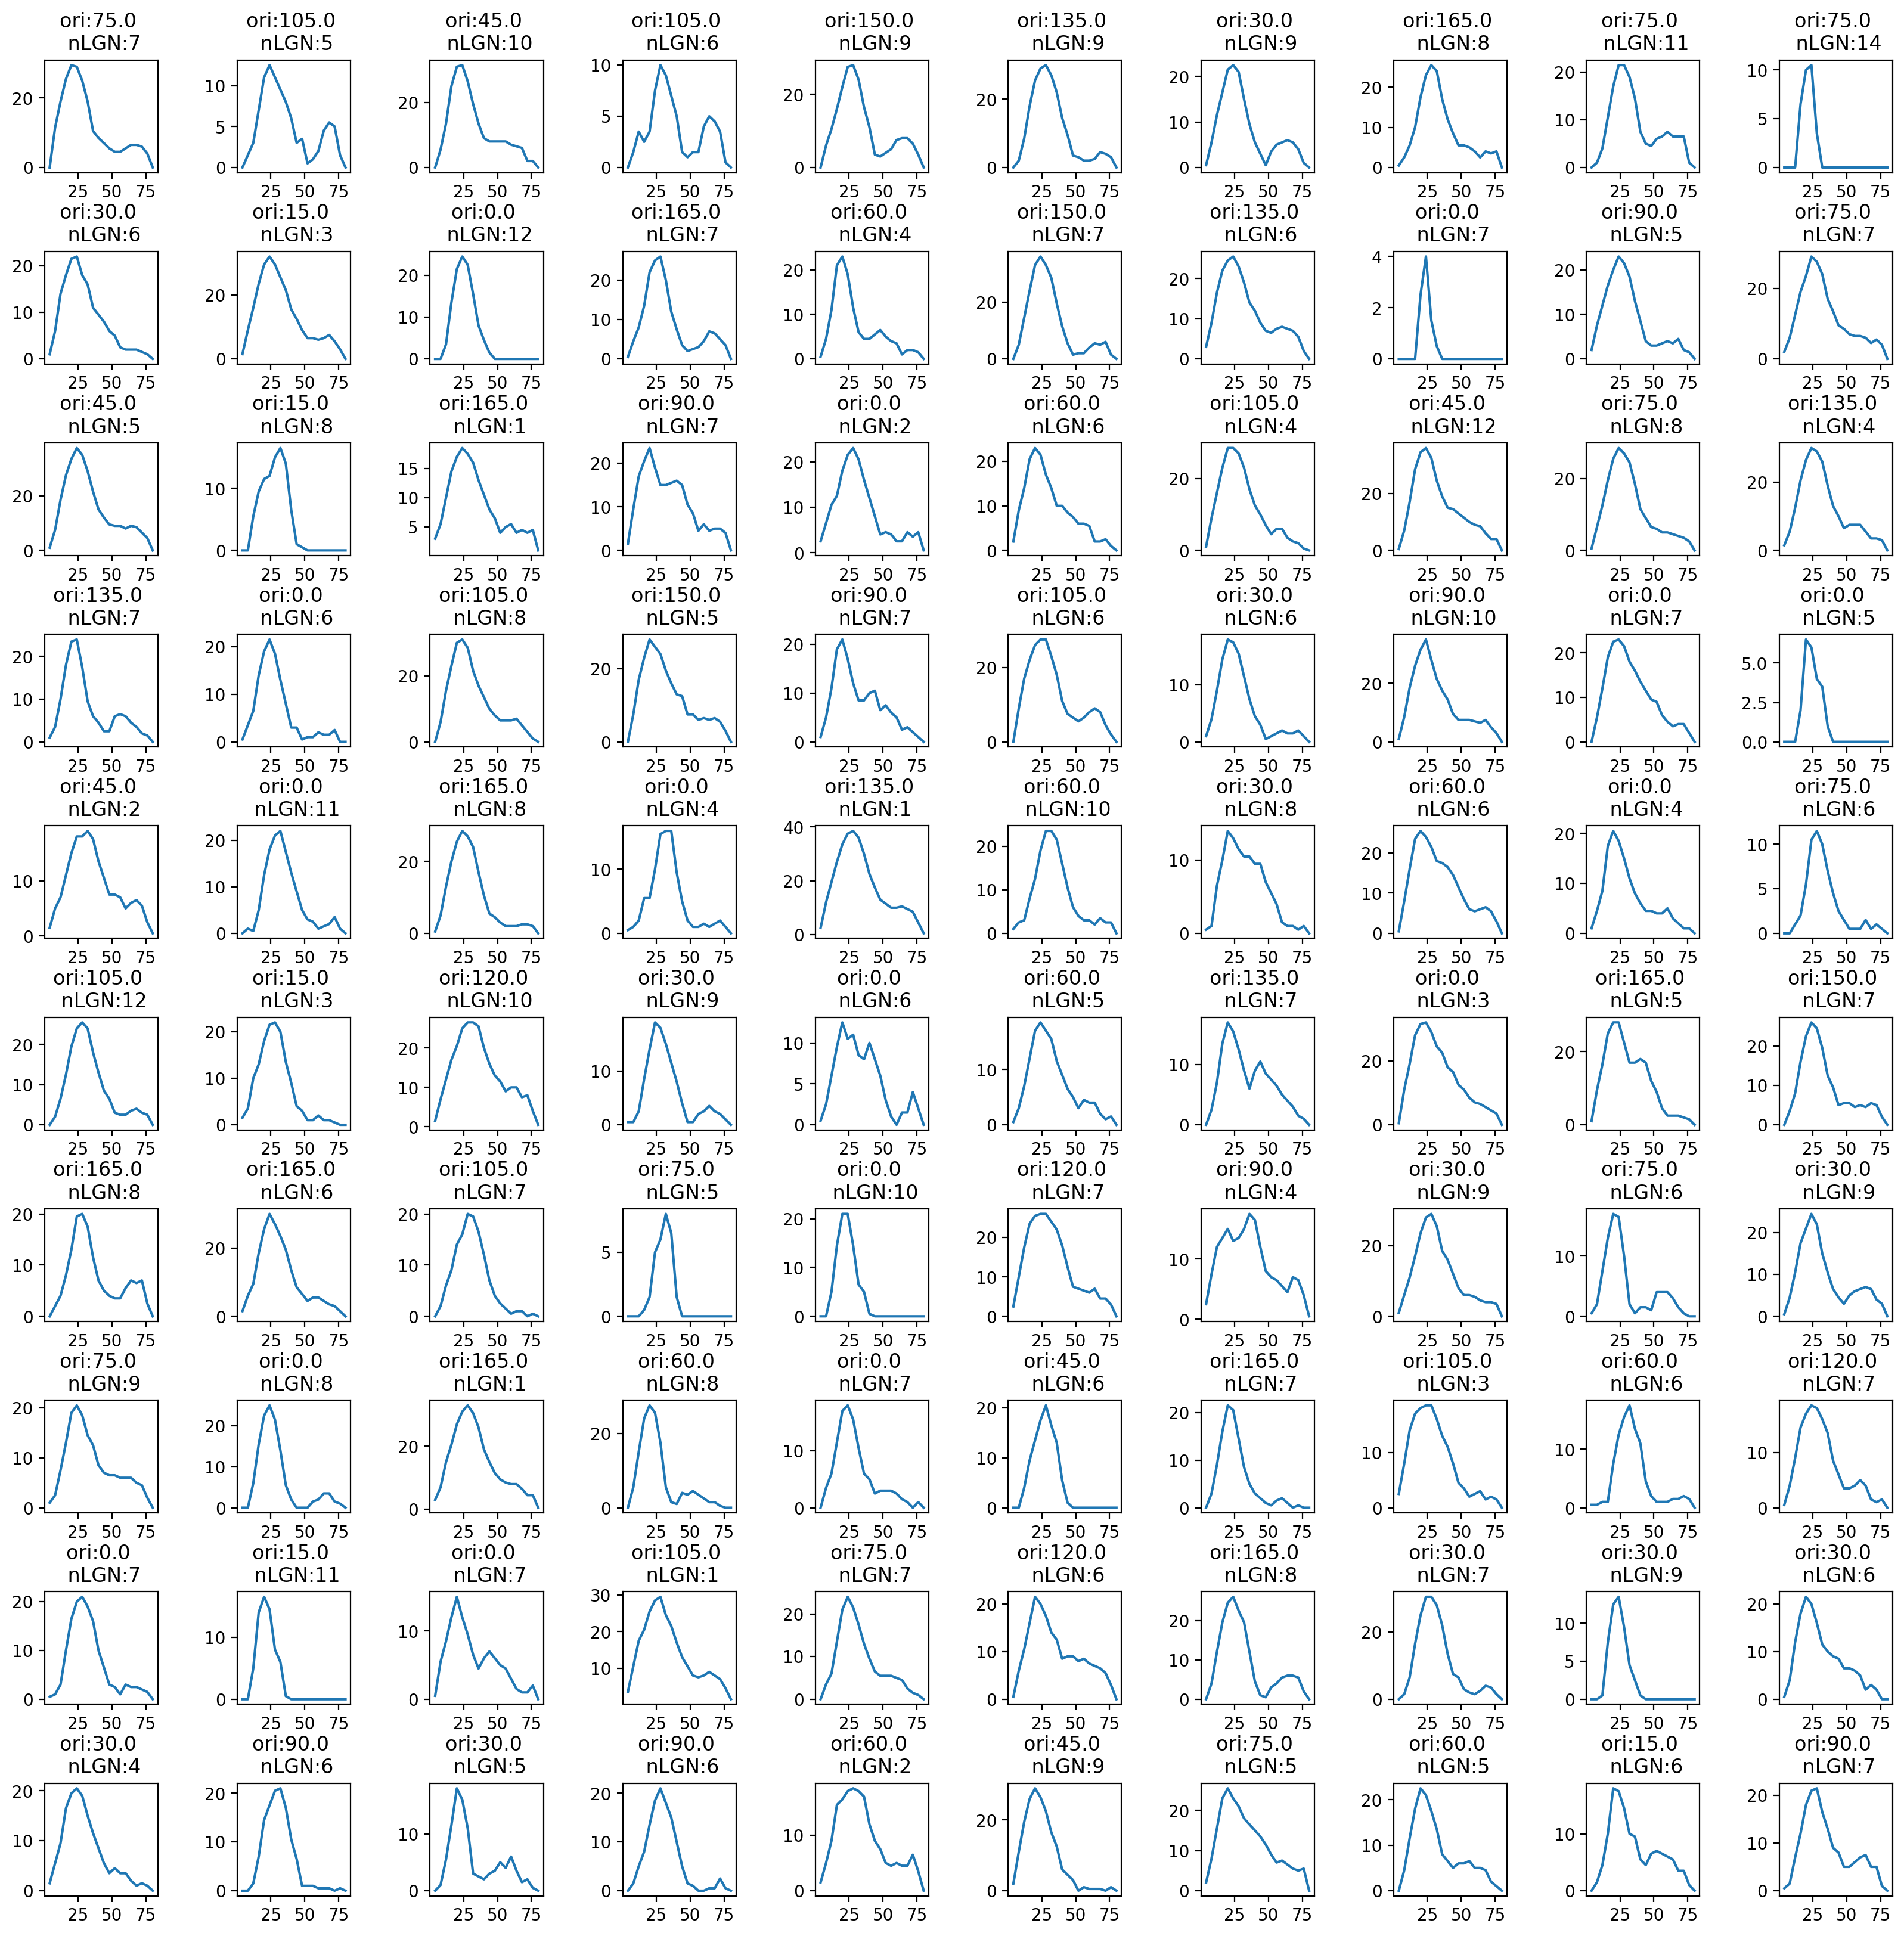

In [25]:
nsf = 20
fig = plt.figure(figsize = (20,20),dpi = 200)
fig.subplots_adjust(hspace = 0.7,wspace = 0.7)
sf = [4+x*4 for x in range(nsf)]
for k in range(100):
    neu_ind = k*5
    while nLGN_V1_E[neu_ind] != 0:
        neu_ind += 2
    tmp_ori = pref_ori[neu_ind]
    # print(tmp_sf )
    tmp_fr = fr[:,neu_ind][cfg[:,1]==tmp_ori ]

    ax = fig.add_subplot(10,10,k+1)
    ax.plot(sf,tmp_fr)
    ax.set_title(f'ori:{tmp_ori} \n nLGN:{nLGN_V1_E[neu_ind]}')
    
plt.show()
fig.savefig('./'+pixel+'_sample_sf_tc.png')   
plt.close()

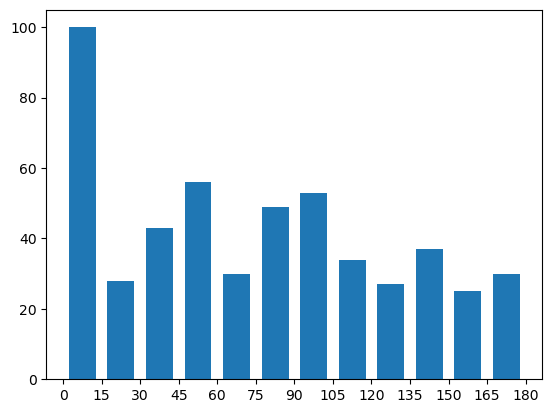

In [75]:
ori_range = np.arange(0,195,15)
plt.hist(LGN_ori,bins=ori_range,rwidth=0.7)
plt.xticks(ori_range)
plt.show()
plt.close()

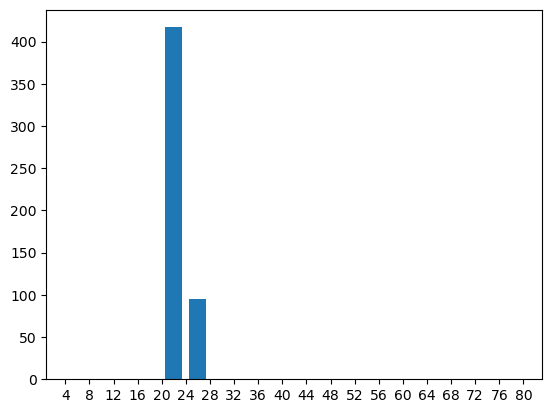

In [76]:
sf_range = np.arange(4,84,4)
plt.hist(LGN_sf,bins=sf_range,rwidth=0.7)
plt.xticks(sf_range)
plt.show()
plt.close()

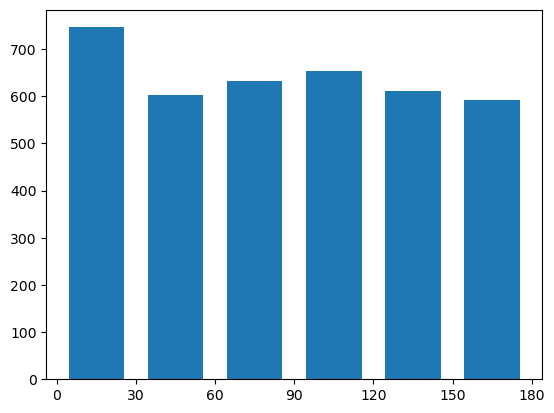

In [41]:
plt.hist(max_idx*30,bins=np.arange(7)*30,rwidth=0.7)
plt.xticks(np.arange(7)*30)
plt.show()
plt.close()

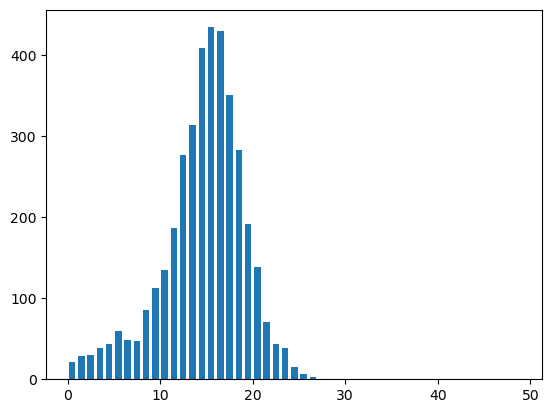

In [42]:
plt.hist(max_fr,bins=np.arange(50),rwidth=0.7)
plt.show()
plt.close()

([<matplotlib.axis.XTick at 0x7f7c3bfc32b0>,
 [Text(0, 0, '0'),
  Text(30, 0, '30'),
  Text(60, 0, '60'),
  Text(90, 0, '90'),
  Text(120, 0, '120'),
  Text(150, 0, '150'),
  Text(180, 0, '180')])

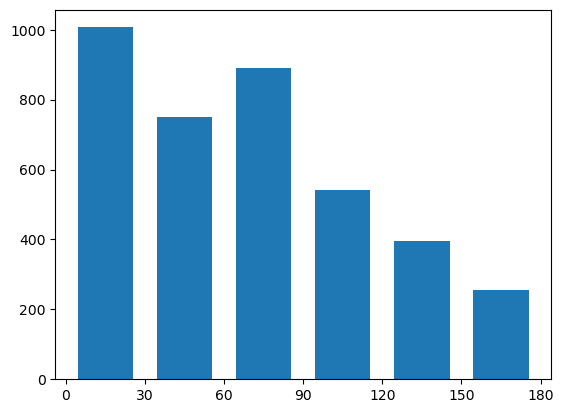

In [32]:
plt.hist(max_idx*30,bins=np.arange(7)*30,rwidth=0.7)
plt.xticks(np.arange(7)*30)
plt.show()
plt.close()

(array([1007.,  751.,  890.,  541.,  397.,  254.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]),
 <BarContainer object of 49 artists>)

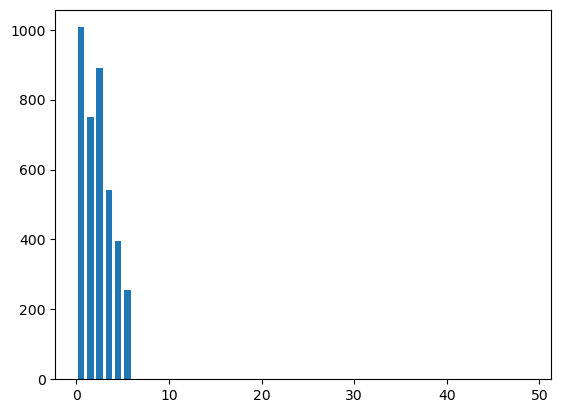

In [35]:
plt.hist(max_fr,bins=np.arange(50),rwidth=0.7)
plt.show()
plt.close()